In [21]:
# Copyright 2022 ns
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import pandas as pd
import numpy as np
import tensorflow as tf


In [33]:
#read hte dataset
dataset = '/Users/ns/development/iisc/WLDS2/data/out/dataset_1.csv'

dataset_df = pd.read_csv(dataset)
dataset_df.head()
#***

,Sample#,spectral_centroid,spectral_bandwidth,spectral_rolloff,onset_strength,mfcc,zero_crossing_rate,percussion,label
0,0,2511.386250,2729.875912,5842.984906,1.045006,-9.416307,0.111454,0.000439,running water/noise
1,1,4404.511193,2927.396323,8127.717219,1.153729,-6.239438,0.332613,0.001991,running water/noise
2,2,1493.985935,2298.555600,3552.204076,0.964541,-7.512391,0.034406,0.000318,running water/noise
3,3,6176.509396,2558.997845,9052.090669,1.014228,-9.270225,0.586167,0.004790,running water/noise
4,4,3261.177446,2767.363092,6846.577785,1.043973,-12.088974,0.200988,0.001987,running water/noise


In [23]:
#ormalize feature data - should we use it? 

# from sklearn import preprocessing

# ind_columns = ['spectral_centroid', 'spectral_bandwidth',
#                'spectral_rolloff', 'onset_strength',
#                'mfcc', 'zero_crossing_rate', 'percussion']
#feature_arr = np.array(dataset_df[ind_columns])
# norm_feat_arr = preprocessing.normalize(feature_arr)
# print(norm_feat_arr)


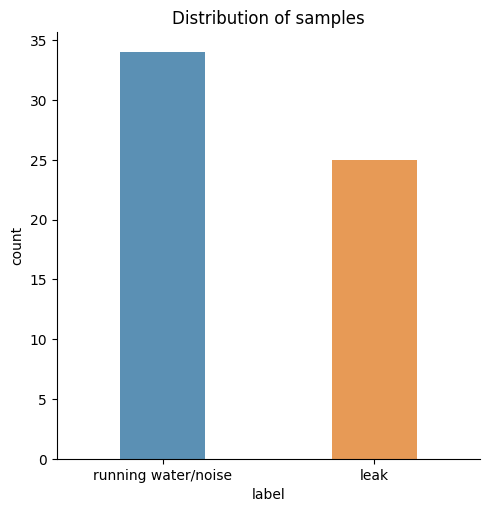

In [24]:
#Frequency distribution of  data
import matplotlib.pyplot as plt 
import seaborn as sns

sns.catplot(x='label', data=dataset_df, kind='count', width=0.4, alpha=0.8)
# set the title
plt.title('Distribution of samples')
# show the plot
plt.show()

####

In [25]:
#convert the data to appropriate axes

from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

ind_columns = ['spectral_centroid', 'spectral_bandwidth',
               'spectral_rolloff', 'onset_strength',
               'mfcc', 'zero_crossing_rate', 'percussion']

X = np.array(dataset_df[ind_columns])
y = np.array(dataset_df['label']).tolist()

#print(y)

le = LabelEncoder()
#- labels into class
#y = le.fit_transform(y)
y = to_categorical(le.fit_transform(y))
#print(y)
#print(y_cat)
 



In [26]:
import tensorflow as tf
# print(tf.__version__)

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation,  Flatten
from keras.optimizers import Adam
from keras import metrics, losses


In [27]:
# #NN Architecture 

model = Sequential([layers.Dense(100, activation='relu'),
                    #layers.Dropout(0.3),
                    layers.Dense(100, activation="relu"), 
                    #layers.Dropout(0.3),
                    layers.Dense(2, activation="softmax")
                        ])
#print("Gone past")
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='Adam')


In [28]:
#Result analysis - this function is called later from the main cells
#plots train and test accuracy on one plot and train and test loss on another
#parameters are test split, epochs, history, train and test scores 
def plot_data(split, e, his, train_score, test_score):
    
    X = np.linspace(0, e, e)
    # Assign variables to the y axis part of the curve
    y = his.history['accuracy']
    z = his.history['val_accuracy']

    figure, (acc, los) = plt.subplots(1, 2, figsize=(8, 4))
   
    test_avg_acc  = 'avg acc {acc}'.format(acc=round(test_score[1],4))
    # print("train_avg_acc=" , train_avg_acc)
    # Plotting both the curves simultaneously
    acc.plot(X, y, color='c',   label='train', linewidth=2, linestyle=':' )
    acc.plot(X, z, color='y',  label='val', linewidth=2, linestyle='-.')
    acc.set_title("Accuracy")
   
    los.plot(X, his.history['loss'], color='c',
             label='train', linewidth=2, linestyle=':')
    los.plot(X, his.history['val_loss'], color='y',
             label='val', linewidth=2, linestyle='-.')
    los.set_title("Loss")
    test_avg_loss = 'avg acc {los}'.format(los=round(test_score[0],4))
    
    
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize=10)  
    figure.suptitle('Test split = {split}, #Epochs = {e}'.format(
        split=split, e=e), fontsize=20, fontweight='bold')
    figure.subplots_adjust(top=.8)
    
    plt.savefig('/Users/ns/development/iisc/WLDS2/data/out/plot_{split}_{e}.png'.format(
        split=split, e=e), bbox_inches='tight')

    plt.show()
   
    return


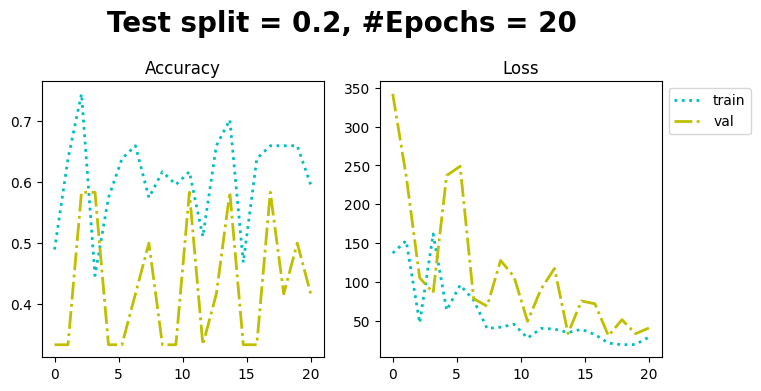

1/1 [==============================] - 0s 82ms/step


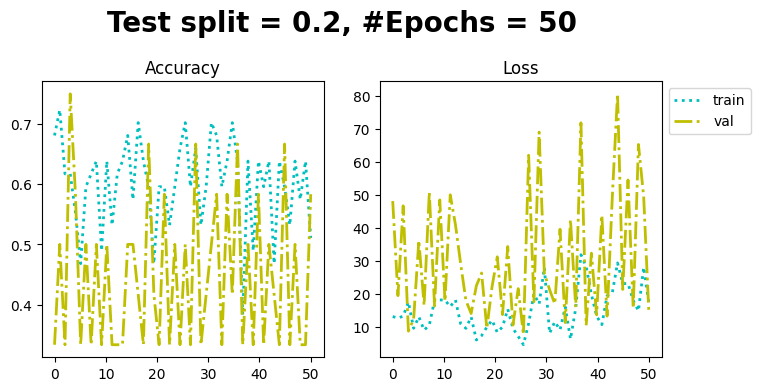

1/1 [==============================] - 0s 31ms/step


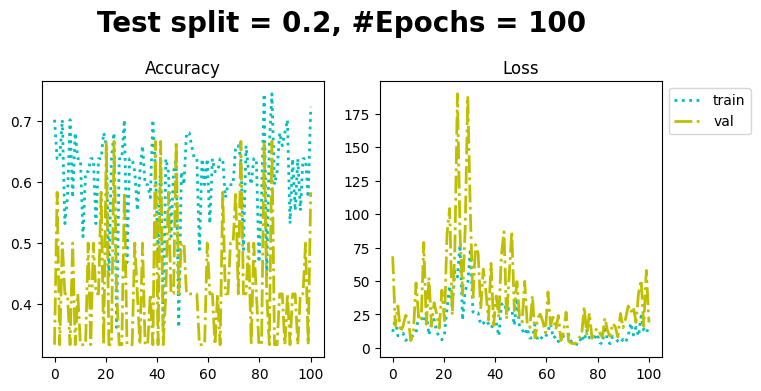

1/1 [==============================] - 0s 27ms/step


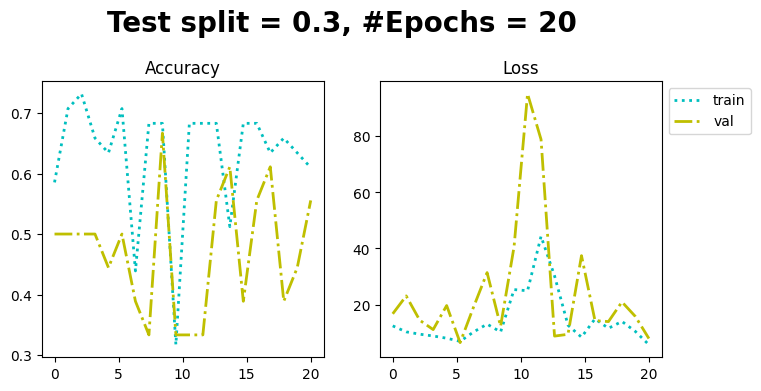

1/1 [==============================] - 0s 56ms/step


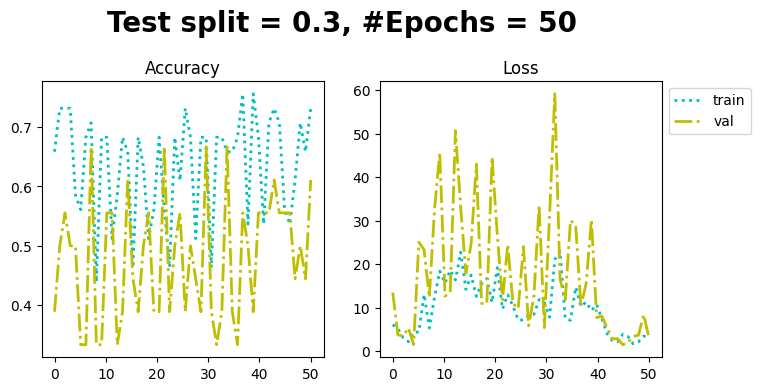

1/1 [==============================] - 0s 80ms/step


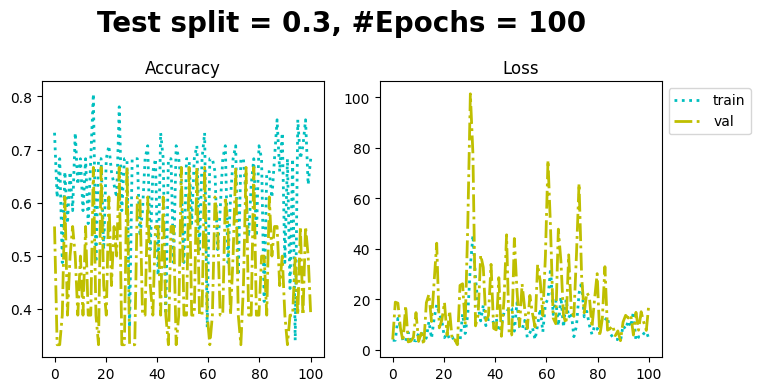

1/1 [==============================] - 0s 49ms/step


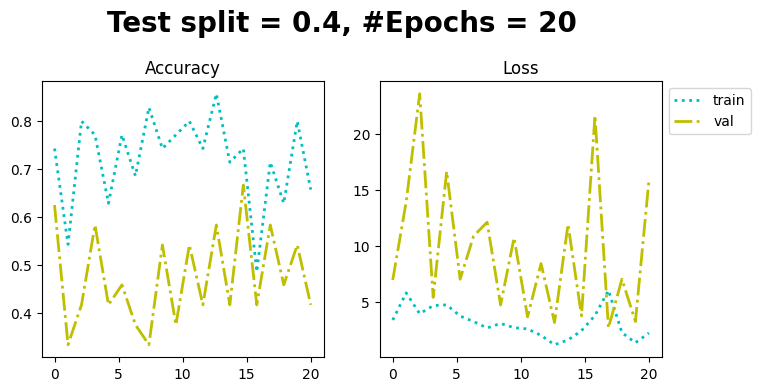

1/1 [==============================] - 0s 33ms/step


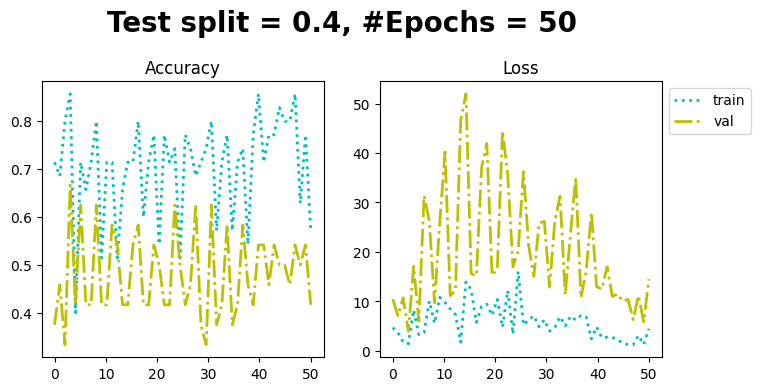

1/1 [==============================] - 0s 84ms/step


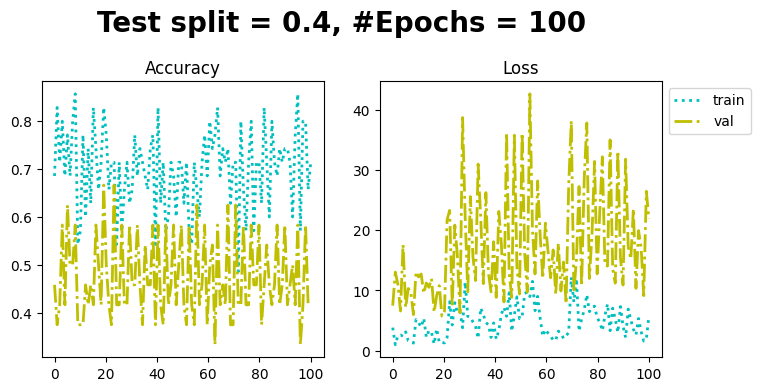

1/1 [==============================] - 0s 29ms/step


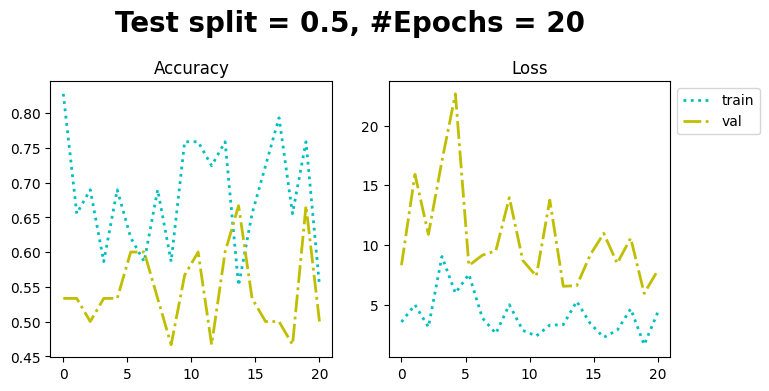

1/1 [==============================] - 0s 30ms/step


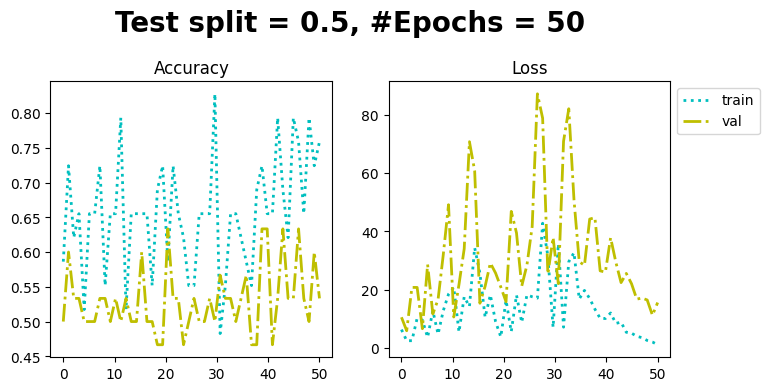

1/1 [==============================] - 0s 28ms/step


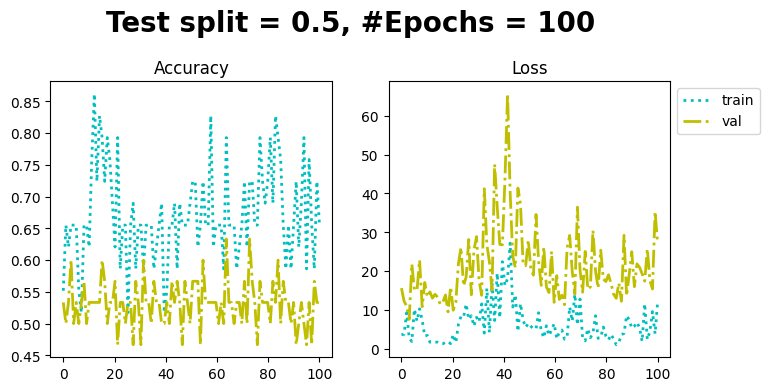

1/1 [==============================] - 0s 31ms/step


In [29]:
### main cell 
# for different split proprtions and different epochs, fir the model
# evaluate, plot and save the results
import warnings
warnings.filterwarnings('ignore')
#Split data & Train the model

split_set = [.2, .3, .4, .5]
num_epochs = [20, 50, 100]
num_batch_size = 21

#for testing
# split_set = [.2]
# num_epochs = [10]


#train the model
saved_results = []
saved_metrics = []
for test_set in split_set:
    X_train, X_test, y_train,  y_test = train_test_split(
        X, y, test_size=test_set, random_state=0)
  #  print(X_train.shape, X_test.shape)

    for tr_epoch in num_epochs:
        #print(X_test.shape, y_test.shape)
        # print(X_train.dtype, y_train.dtype)
        history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=tr_epoch,
            verbose=0, validation_data=(X_test, y_test))
        
        train_score = model.evaluate(X_train, y_train, verbose=0)
        test_score = model.evaluate(X_test, y_test, verbose=0)
    
        plot_data(test_set, tr_epoch, history, train_score, test_score)

        #prediction
        pred = model.predict(X_test)
        pred = np.argmax(pred, axis=1)
        label = np.argmax(y_test, axis=1)
        # print("Pred", pred)
        # print("label", label )
        saved_results.append(
            [test_set, X_train.shape[0], X_test.shape[0], tr_epoch,
             history.history['loss'], history.history['accuracy'],
             history.history['val_loss'], history.history['val_accuracy']])
        saved_metrics.append([test_set, tr_epoch, pred, label, test_score])
        #print("(%f, %s) predicted: %s, actual: %s", (test_set, tr_epoch, pred, label))
        
 #training done, resutlts plotted and saved




In [34]:
#print("Convert to df and save")

saved_columns = ['test split', 'train samples', 'test samples','epochs', 
        'train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']

# all data used for the plots to be saved to plots_1.csv
results_df = pd.DataFrame(saved_results, columns=saved_columns)
#print(results_df)

out_file_path = '/Users/ns/development/iisc/WLDS2/data/out/'
results_df.to_csv(out_file_path + 'plots_1.csv', index=False)

#metrics and prediction to be saved in metrics_1.csv
metrics_cols = ['test_set', 'tr_epoch', 'pred', 'label', 'test_score']
metrics_df = pd.DataFrame(saved_metrics, columns=metrics_cols)
metrics_df.to_csv(out_file_path + 'metrics_1.csv', index=False)
metrics_df

####End of training. result and metrics file is saved. 


,test_set,tr_epoch,pred,label,test_score
0,0.2,20,"[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[40.451908111572266, 0.4166666567325592]"
1,0.2,50,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[13.796875953674316, 0.5833333134651184]"
2,0.2,100,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]","[18.96671485900879, 0.5833333134651184]"
3,0.3,20,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[7.89695405960083, 0.5555555820465088]"
4,0.3,50,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[3.093771457672119, 0.6111111044883728]"
5,0.3,100,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[18.364755630493164, 0.3888888955116272]"
6,0.4,20,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[15.848278999328613, 0.4166666567325592]"
7,0.4,50,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[14.476912498474121, 0.4166666567325592]"
8,0.4,100,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[21.849288940429688, 0.4166666567325592]"
9,0.5,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, ...","[7.851890563964844, 0.5]"
